### Problem Statement: I am given the limited data from a reputed retail website that include relevant information of the consumer behavior through website engagement for multiple product purchase.

### As I am helping with the solution, I have to perform detail EDA on the data and prepare a prediction model which predicts whether a consumer will purchase the product after their visit on the website.

In [1]:
# we import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/content/customer_behaviour.csv')
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [3]:
# describing stats of variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,14578.0,2.250240,3.288042,0.0,0.000000,1.000000,3.000000,27.000000
HomePage_Duration,14581.0,79.300762,179.374699,0.0,0.000000,5.000000,91.000000,3398.750000
LandingPage,14578.0,0.490739,1.252376,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,14596.0,33.455943,140.146256,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,14608.0,31.559488,44.897089,0.0,7.000000,17.500000,38.000000,705.000000
ProductDescriptionPage_Duration,14564.0,1184.346084,2009.496307,0.0,173.187500,584.333333,1434.255128,63973.522230
GoogleMetric:Bounce Rates,14580.0,0.023366,0.050011,0.0,0.000000,0.003478,0.018182,0.200000
GoogleMetric:Exit Rates,14602.0,0.044664,0.049912,0.0,0.014502,0.026406,0.050000,0.200000
GoogleMetric:Page Values,14599.0,4.812620,16.887366,0.0,0.000000,0.000000,0.000000,361.763742
SeasonalPurchase,14581.0,0.064083,0.202583,0.0,0.000000,0.000000,0.000000,1.000000


In [4]:
data.shape

(14731, 22)

In [5]:
data.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

### It is a dataset of 14 731 rows and 22 columns, 6 columns are of object type, 1 is the target column in type boolean and 15 columns are of float type. There are a missing values in the data set, but we can not just drop the rows with missing values, because they are in many different rows, so if we drop them, we can face much smaller dataset. So to handle that, we fill the missing values accordingly.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [7]:
# we can fill missing values in float columns with the mean and in categorical columns with the mode
float_columns = data.select_dtypes(include='float').columns
categorical_columns = data.select_dtypes(include='object').columns

# Fill missing values in float columns with mean
data[float_columns] = data[float_columns].fillna(data[float_columns].mean())

# Fill missing values in categorical columns with mode
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [8]:
data.info() # now we do not have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  float64
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  float64
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescriptionPage           14731 non-null  float64
 5   ProductDescriptionPage_Duration  14731 non-null  float64
 6   GoogleMetric:Bounce Rates        14731 non-null  float64
 7   GoogleMetric:Exit Rates          14731 non-null  float64
 8   GoogleMetric:Page Values         14731 non-null  float64
 9   SeasonalPurchase                 14731 non-null  float64
 10  Month_SeasonalPurchase           14731 non-null  object 
 11  OS                               14731 non-null  float64
 12  SearchEngine      

### Next is a correlation matrix heat map where we can observe the correlations between the features. A high correlation indicates that one feature significantly influences the other, while a lower correlation suggests they have less impact on each other. Due to the high correlation values above 0.84, I have decided to drop two features to avoid duplicating information.

<ipython-input-9-3a1f21a893d1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)


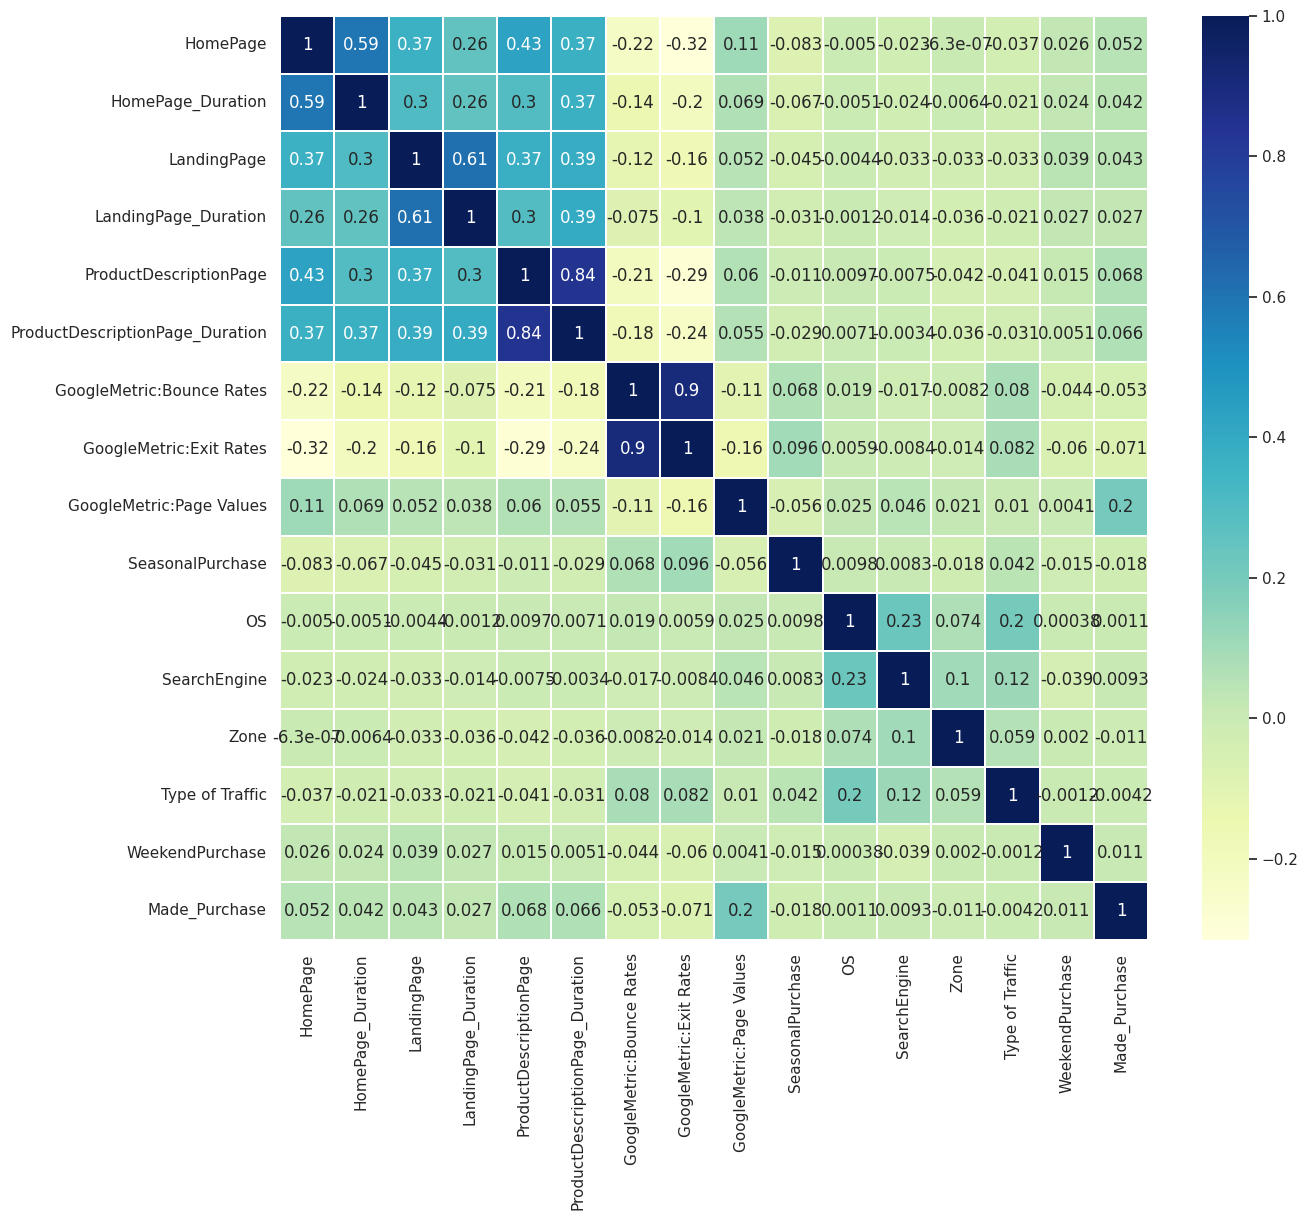

In [9]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))

sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

In [10]:
# I am dropping a pair of columns that are highly correlated with another pair of columns to avoid duplicating information.
columns_to_drop = ['GoogleMetric:Bounce Rates', 'ProductDescriptionPage_Duration']
data = data.drop(columns=columns_to_drop)

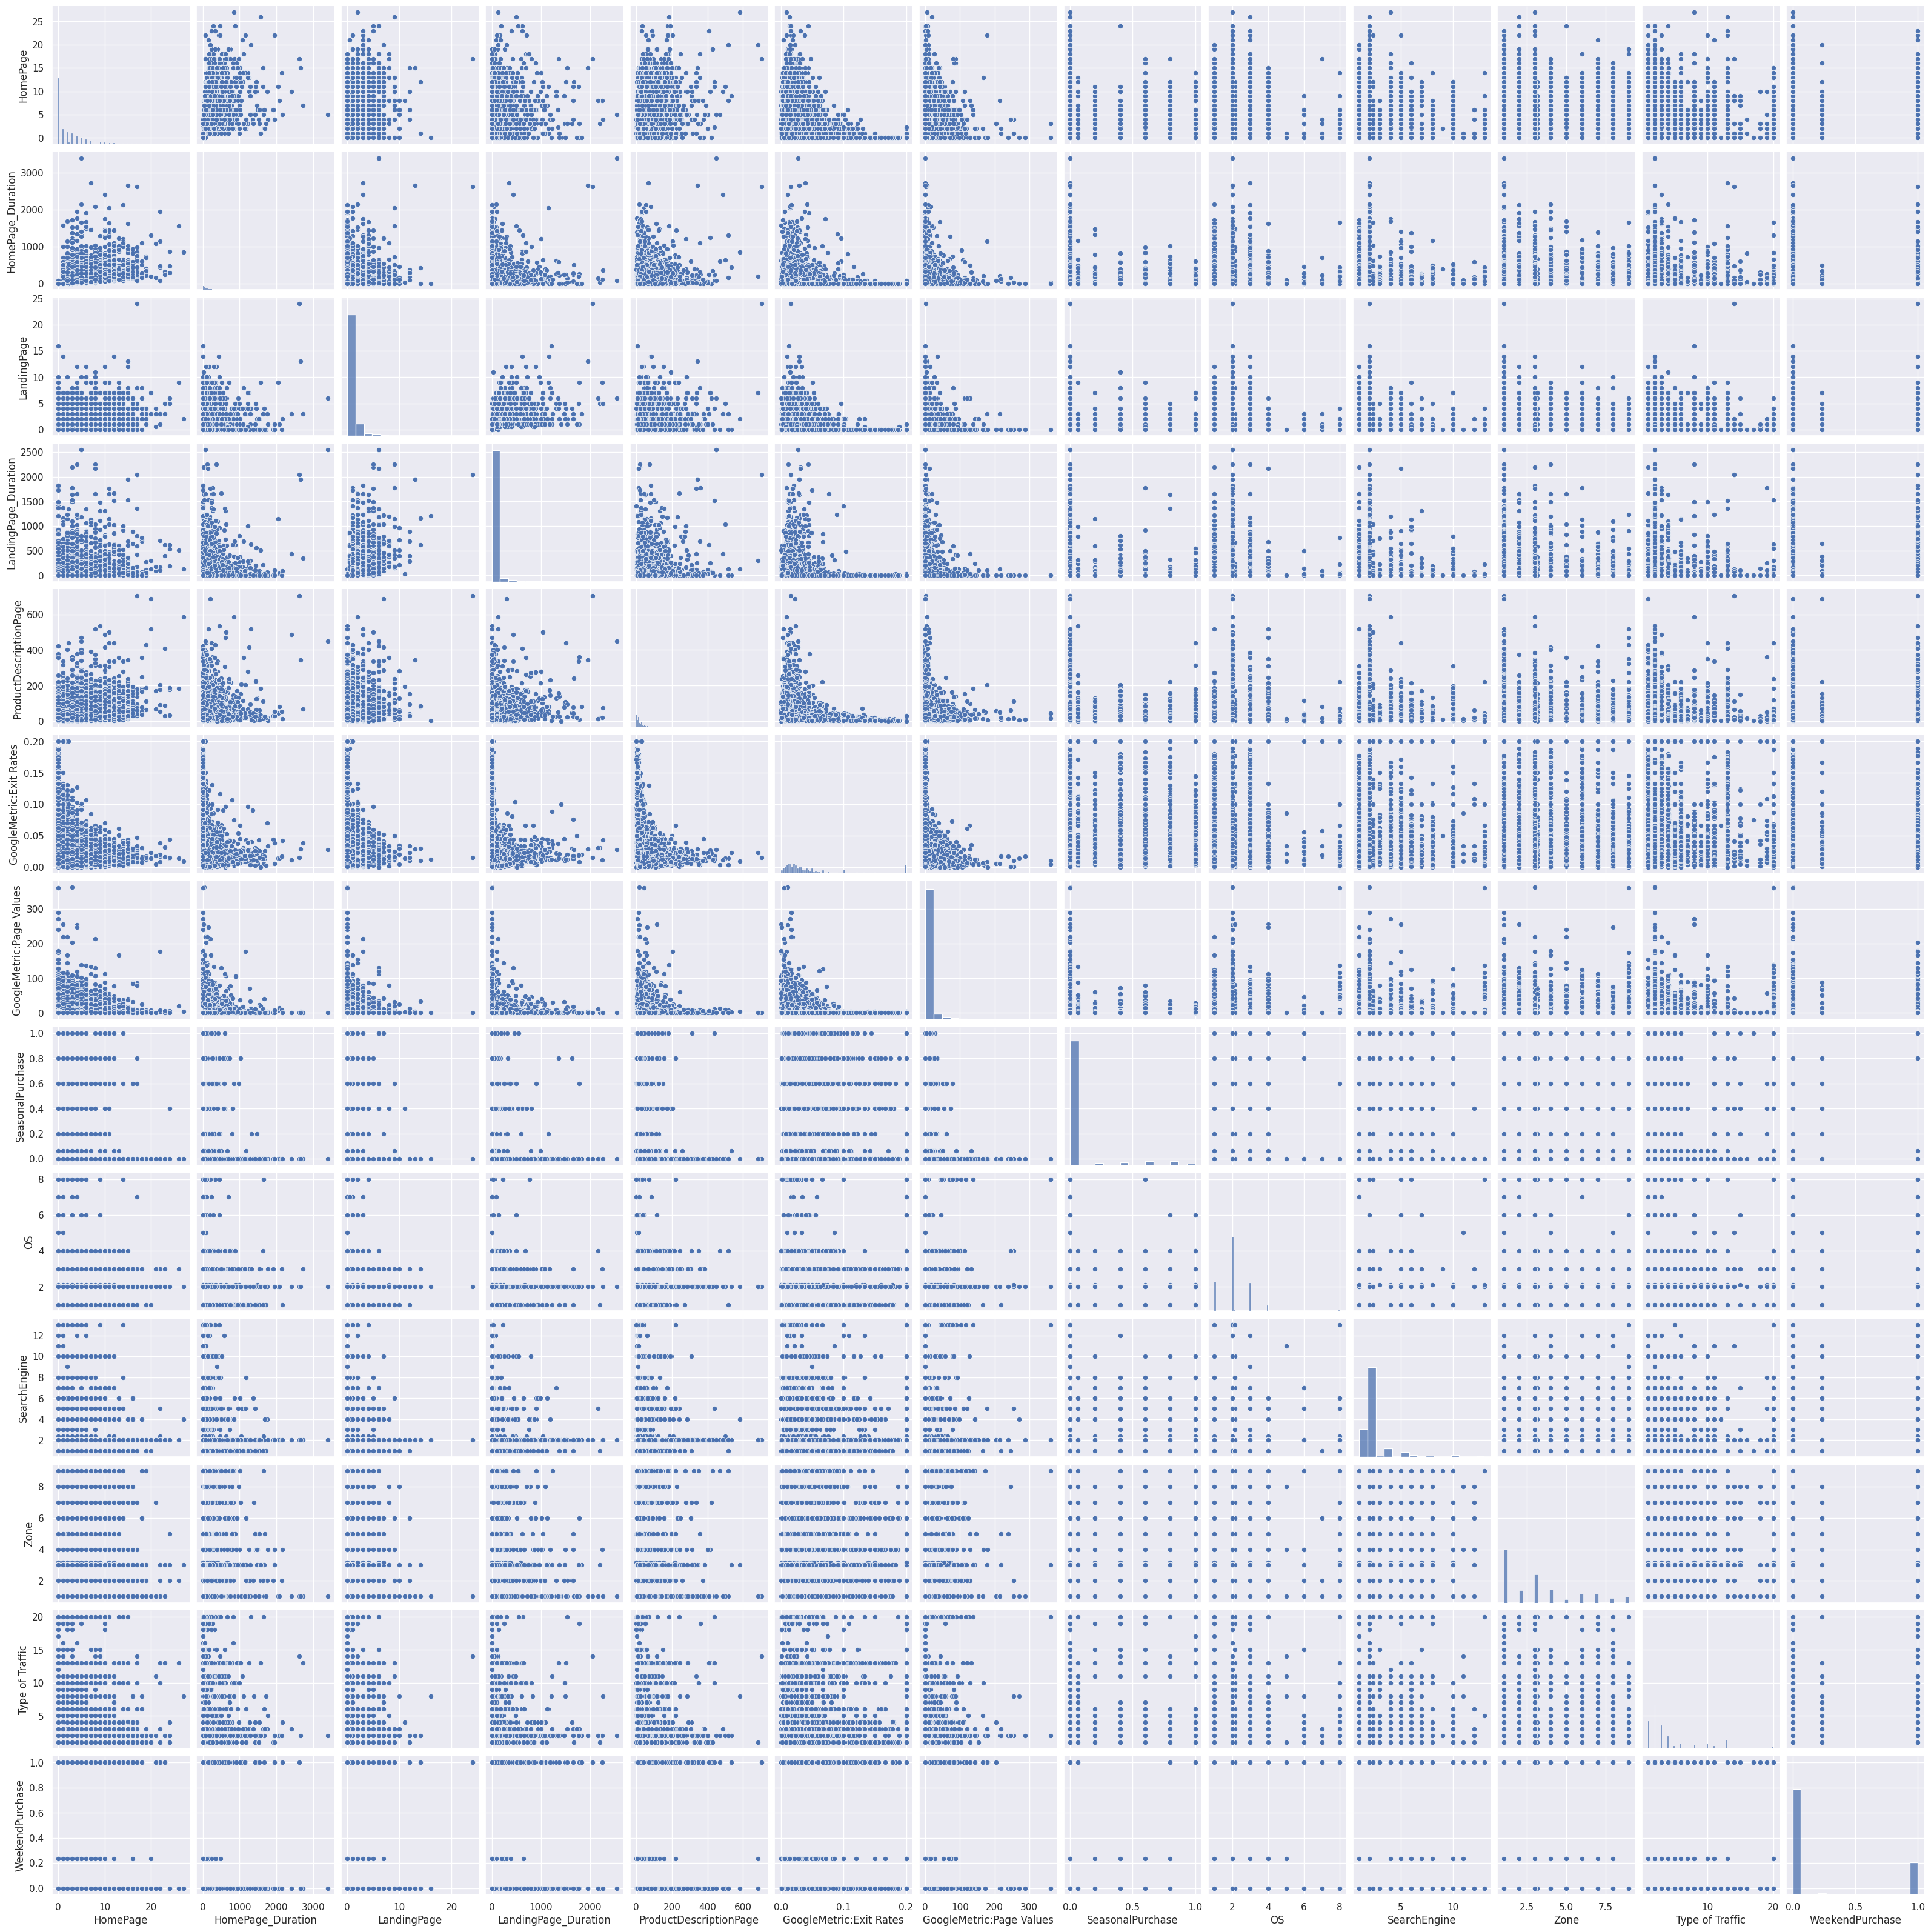

In [11]:
# with seaborn pairplot we can observe the correlations between numerical features.
numerical_columns = ['HomePage','HomePage_Duration','LandingPage','LandingPage_Duration','ProductDescriptionPage'
   ,'GoogleMetric:Exit Rates'
 ,'GoogleMetric:Page Values'
  ,'SeasonalPurchase'
 ,'OS'
  ,'SearchEngine'
   ,'Zone'
  ,'Type of Traffic'

 ,'WeekendPurchase']

sns.pairplot(data[numerical_columns])
plt.show()

### This code will generate a histogram for each numerical column in my DataFrame, showing the distribution of values.

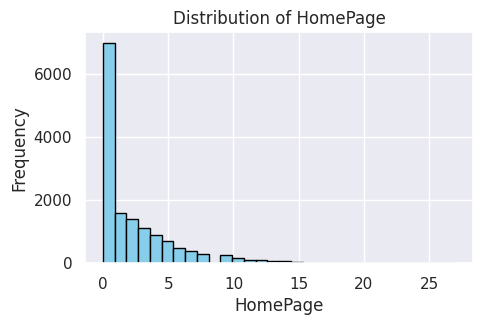

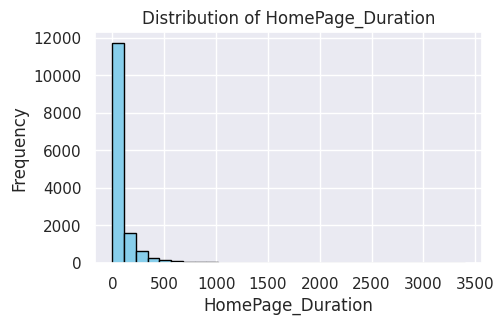

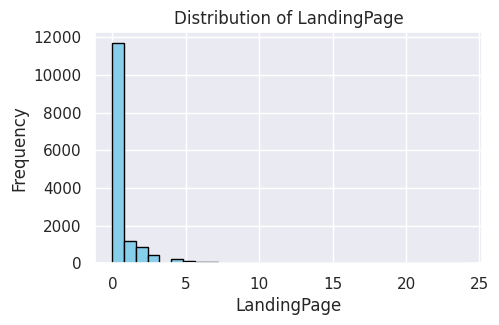

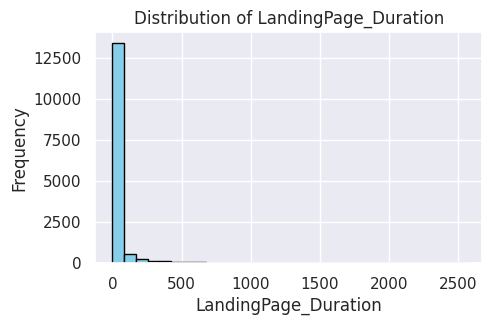

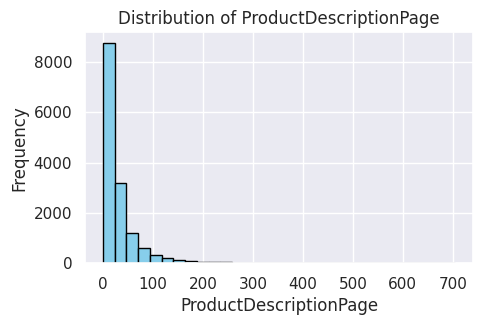

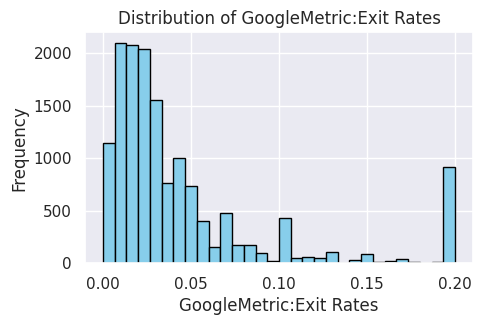

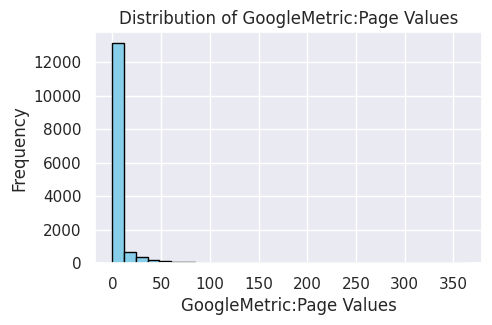

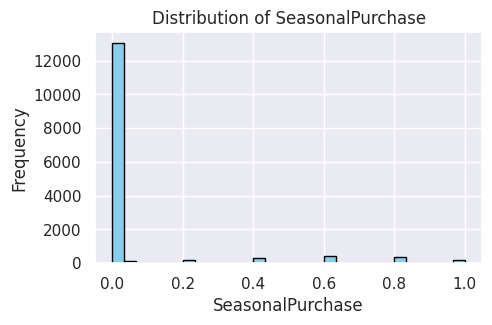

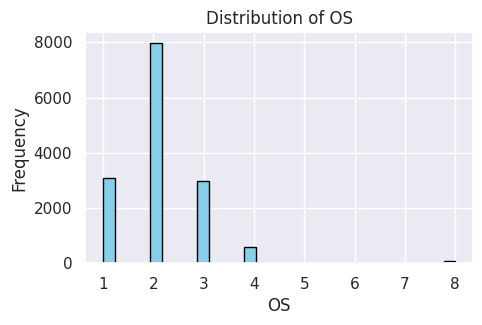

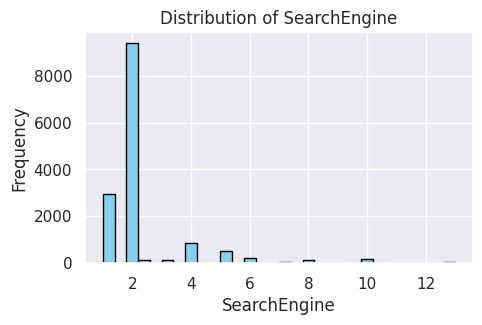

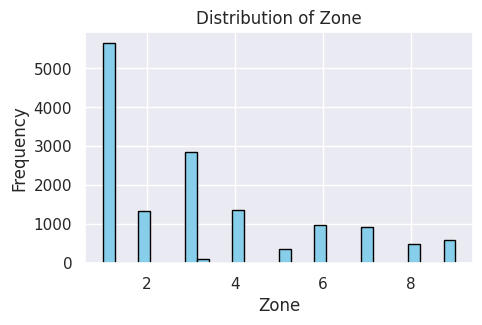

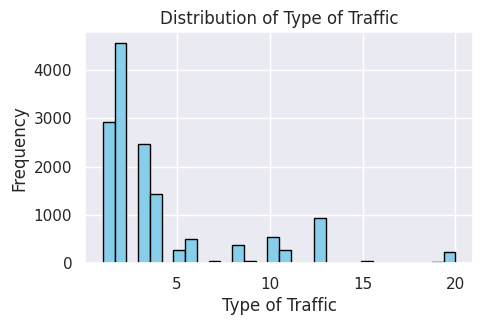

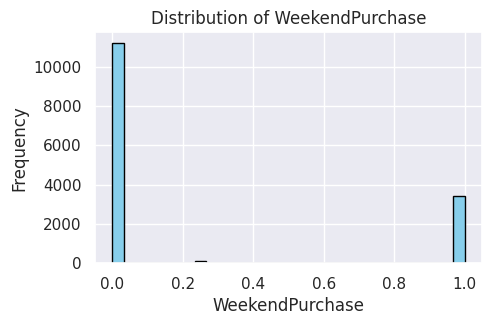

In [12]:
for col in numerical_columns:
    plt.figure(figsize=(5, 3))
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### This code will generate a histogram for each categorical column in my DataFrame, showing the distribution of values.

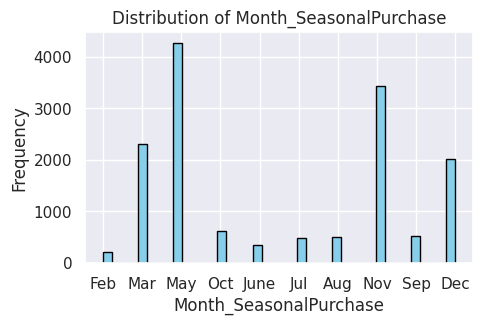

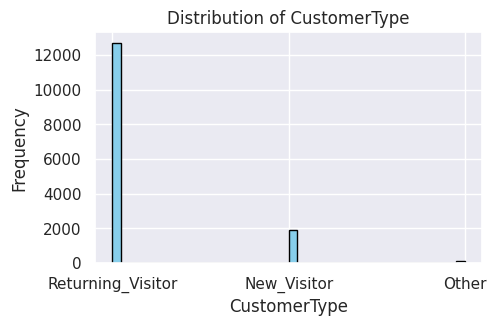

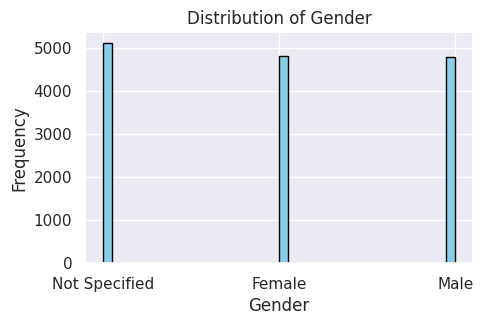

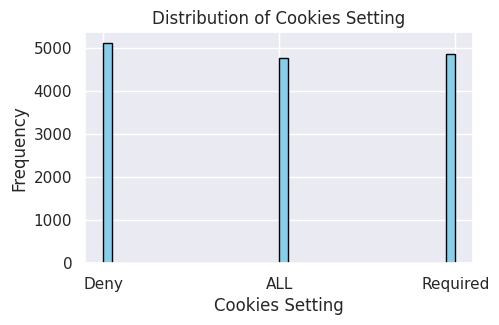

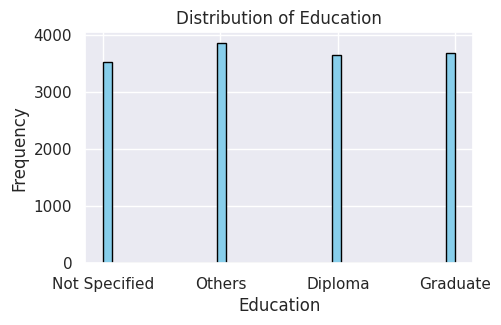

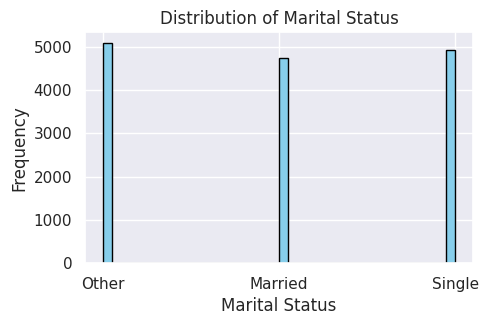

In [13]:
for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    plt.hist(data[col], bins=40, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### This code snippet is intended to handle unexpected values in categorical columns by replacing them with the mode, which is the most frequently occurring value in each respective categorical column. Here's an explanation of what each part of the code does:

- The loop iterates over each categorical column in the DataFrame.

- For each categorical column, the mode (most frequently occurring value) is calculated using the mode() function. The [0] index is used to extract the mode value, as mode() returns a Series containing the mode value(s) along with their counts.

- The unexpected value (e.g., 'unexpected_value') in each categorical column is replaced with the mode value using the replace() function.

- This approach is often used for handling unexpected or missing categorical values because it replaces them with a value that is representative of the majority of the data in the column. By replacing unexpected values with the mode, we aim to maintain the integrity of the data while minimizing the impact of outliers or errors.


In [14]:
# Replace unexpected values with the mode (most frequently occurring value) of the respective categorical column
for column in categorical_columns:
    mode_value = data[column].mode()[0]
    data[column] = data[column].replace('unexpected_value', mode_value)

### This code snippet is designed to handle skewed distributions in numerical columns by applying a logarithmic transformation.

- The variable skewed_columns is specified to contain the names of numerical columns that exhibit skewness in their distributions. Skewness is a measure of asymmetry in the distribution of values.

- For each column specified in skewed_columns, a logarithmic transformation is applied using the np.log1p() function. The log1p function calculates the natural logarithm of the input value plus 1, which is useful for data that contains zero values since it avoids taking the logarithm of zero.

- The first few rows of the transformed data are displayed to observe the effect of the logarithmic transformation on the skewed columns.

- Logarithmic transformation is commonly used to reduce the skewness of data, particularly when the distribution is right-skewed (positively skewed), meaning that there is a long tail on the right side of the distribution. By applying this transformation, we aim to make the distribution more symmetrical and closer to a normal distribution, which can be beneficial for certain statistical analyses and modeling techniques that assume normality.


In [15]:
skewed_columns = numerical_columns # Specify the skewed numerical columns
data[skewed_columns] = data[skewed_columns].apply(lambda x: np.log1p(x))

data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.000000,0.0,0.0,0.0,0.693147,0.182322,0.0,0.000000,Feb,1.609438,0.693147,2.302585,1.386294,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.000000,False
1,0.000000,0.0,0.0,0.0,1.098612,0.131028,0.0,0.000000,Feb,1.386294,1.098612,1.098612,1.609438,Returning_Visitor,Female,Deny,Others,Married,0.000000,False
2,0.000000,0.0,0.0,0.0,2.397895,0.048790,0.0,0.000000,Feb,1.386294,1.386294,0.693147,1.609438,Returning_Visitor,Female,ALL,Others,Married,0.693147,False
3,0.000000,0.0,0.0,0.0,0.693147,0.182322,0.0,0.336472,Feb,1.098612,1.609438,1.386294,1.386294,Returning_Visitor,Male,ALL,Diploma,Single,0.000000,False
4,0.693147,0.0,0.0,0.0,0.000000,0.182322,0.0,0.000000,Feb,0.693147,1.098612,0.693147,1.791759,Returning_Visitor,Male,Deny,Diploma,Other,0.693147,False


### The pd.get_dummies() function from the Pandas library is used to perform one-hot encoding on the specified categorical columns. This function creates binary (0 or 1) dummy variables for each category within each categorical column.

In [16]:
# Assuming 'data' is your DataFrame
object_columns = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']

# Apply one-hot encoding to the object columns
data_encoded = pd.get_dummies(data, columns=object_columns)

In [17]:
# Display the first few rows of the one-hot encoded data
data_encoded.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Married,Marital Status_Other,Marital Status_Single
0,0.000000,0.0,0.0,0.0,0.693147,0.182322,0.0,0.000000,1.609438,0.693147,...,0,1,0,0,0,1,0,0,1,0
1,0.000000,0.0,0.0,0.0,1.098612,0.131028,0.0,0.000000,1.386294,1.098612,...,0,1,0,0,0,0,1,1,0,0
2,0.000000,0.0,0.0,0.0,2.397895,0.048790,0.0,0.000000,1.386294,1.386294,...,1,0,0,0,0,0,1,1,0,0
3,0.000000,0.0,0.0,0.0,0.693147,0.182322,0.0,0.336472,1.098612,1.609438,...,1,0,0,1,0,0,0,0,0,1
4,0.693147,0.0,0.0,0.0,0.000000,0.182322,0.0,0.000000,0.693147,1.098612,...,0,1,0,1,0,0,0,0,1,0


In [18]:
# Assuming 'data' is your dataframe
data['Made_Purchase'] = data['Made_Purchase'].astype(int)

#### Handling imbalanced data is an essential aspect of machine learning, particularly when the classes in the dataset are not represented equally. Imbalanced data can lead to biased models that perform poorly on minority classes. Here's a general approach to address imbalanced data and selecting algorithms that are less sensitive to this issue.

In [19]:
# handle imbalanced data
data['Made_Purchase'].value_counts()

0    9065
1    5666
Name: Made_Purchase, dtype: int64

In [20]:
X = pd.get_dummies(data[['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase']])

y = data['Made_Purchase']

Choosing algorithms that are less sensitive to class imbalance, such as decision trees, random forests, gradient boosted models, or support vector machines (SVMs), is a sensible approach when dealing with imbalanced datasets. Here's a brief explanation of why these algorithms are often preferred for such scenarios.

- Decision Trees:
Decision trees inherently partition the feature space based on information gain or impurity reduction, making them robust to class imbalance.
They can learn non-linear decision boundaries and are less affected by the distribution of classes in the dataset.

- Random Forests:
Random forests are ensembles of decision trees that aggregate predictions from multiple trees.
By combining multiple decision trees, random forests can reduce overfitting and provide more stable predictions, especially on imbalanced data.

- Gradient Boosted Models:
Gradient boosting builds trees sequentially, where each tree corrects the errors of the previous one.
This iterative approach allows gradient boosting to focus more on difficult-to-classify instances, potentially improving performance on minority classes.

- Support Vector Machines (SVMs):
SVMs aim to find the hyperplane that maximizes the margin between different classes.
By maximizing the margin, SVMs are less influenced by the imbalance in class distribution and focus more on the support vectors, which are the instances closest to the decision boundary.

- K-Nearest Neighbors (KNN) algorithm is often considered robust to imbalanced datasets due to its intrinsic nature of making decisions based on the nearest neighbors' class labels.

- Naive Bayes:
Naive Bayes assumes independence between features given the class, making it less sensitive to imbalanced datasets.
It can perform surprisingly well on imbalanced datasets, especially when the class conditional independence assumption holds true.




In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Decision Tree Classifier and its accuracy;

- Performing grid search over a range of hyperparameters to find the optimal combination for our dataset.


The classification report indicates the performance of the model:


- Precision measures the accuracy of positive predictions.
- Recall measures the proportion of actual positives that were correctly predicted.
- F1-Score is the harmonic mean of precision and recall.
- Accuracy is the overall accuracy of the classifier.
- Support indicates the number of actual occurrences of each class in the test set.

In [23]:
import warnings
warnings.filterwarnings('ignore')

# Define DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train DecisionTreeClassifier with best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Predictions on test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

decisiontree_report = classification_report(y_test, y_pred)

# Displaying classification report
print(decisiontree_report)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.6312217194570136
              precision    recall  f1-score   support

           0       0.64      0.96      0.76      2757
           1       0.56      0.09      0.16      1663

    accuracy                           0.63      4420
   macro avg       0.60      0.52      0.46      4420
weighted avg       0.61      0.63      0.54      4420



F1 Score: 0.16065911431513902
AUC-ROC: 0.5799260004218203


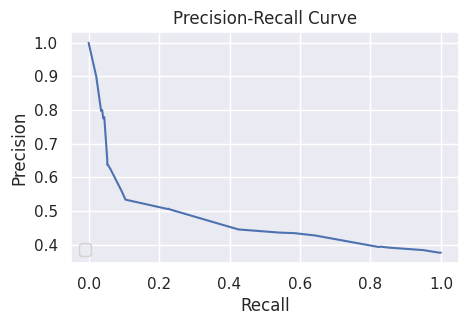

Confusion Matrix:
[[2634  123]
 [1507  156]]


In [24]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Area Under the ROC Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, best_dt_classifier.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, best_dt_classifier.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


### 2. Random Forest Classifier and its accuracy;

- Performing grid search over a range of hyperparameters to find the optimal combination for our dataset.

In [25]:
# Creating a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Perform GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Random Forest classifier with best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

randomforest_report = classification_report(y_test, y_pred)

# Displaying classification report
print(randomforest_report)

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.676923076923077
              precision    recall  f1-score   support

           0       0.67      0.93      0.78      2757
           1       0.69      0.25      0.37      1663

    accuracy                           0.68      4420
   macro avg       0.68      0.59      0.58      4420
weighted avg       0.68      0.68      0.63      4420



F1 Score: 0.3698146513680494
AUC-ROC: 0.6084993078352353


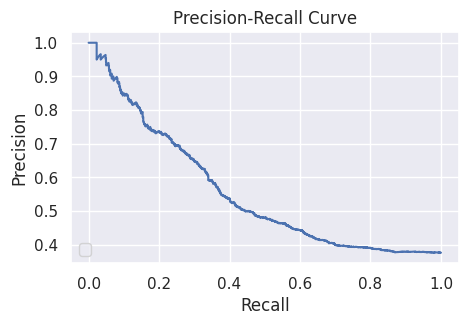

Confusion Matrix:
[[2573  184]
 [1244  419]]


In [26]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Area Under the ROC Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


### 3. Gradient Boosting Classifier and its accuracy



In [27]:
import warnings
warnings.filterwarnings('ignore')

# Creating a Gradient Boosting classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train Gradient Boosting classifier
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

gradientboost_report = classification_report(y_test, y_pred)

# Displaying classification report
print(gradientboost_report)

Accuracy: 0.6739819004524887
              precision    recall  f1-score   support

           0       0.68      0.91      0.78      2757
           1       0.66      0.27      0.39      1663

    accuracy                           0.67      4420
   macro avg       0.67      0.59      0.58      4420
weighted avg       0.67      0.67      0.63      4420



F1 Score: 0.3881104033970276
AUC-ROC: 0.5994102149865722


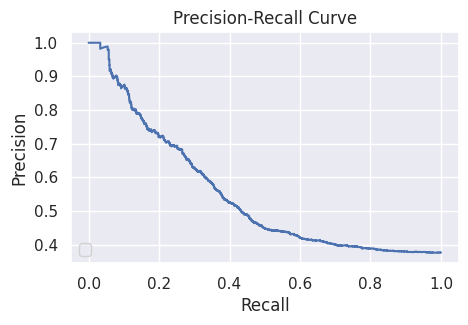

Confusion Matrix:
[[2522  235]
 [1206  457]]


In [28]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Area Under the ROC Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


### 4. SVM Classifier and its accuracy



In [29]:
# Creating an SVM classifier
clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability = True, random_state=42)

# Training the SVM classifier
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

svm_report = classification_report(y_test, y_pred)

# Displaying classification report
print(svm_report)

Accuracy: 0.6728506787330317
              precision    recall  f1-score   support

           0       0.68      0.90      0.77      2757
           1       0.64      0.29      0.40      1663

    accuracy                           0.67      4420
   macro avg       0.66      0.60      0.59      4420
weighted avg       0.67      0.67      0.63      4420



F1 Score: 0.401985111662531
AUC-ROC: 0.5808318016720572


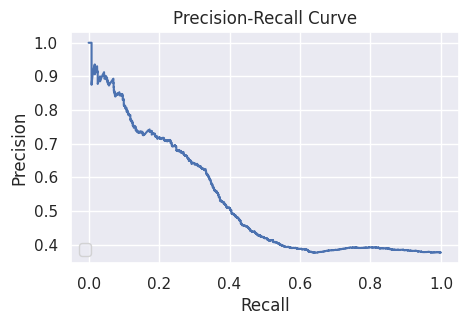

Confusion Matrix:
[[2488  269]
 [1177  486]]


In [30]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Area Under the ROC Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("AUC-ROC:", auc_roc)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


### 5. Naive Bayes Classifier and its accuracy

- Performing grid search over a range of 'var_smoothing' hyperparameter to find the optimal value for our dataset.


In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Creating a Naive Bayes classifier
clf_nb = GaussianNB()

# Define parameter grid for GridSearchCV
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=clf_nb, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Gaussian Naive Bayes classifier with best parameters
best_nb_classifier = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_nb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_nb = best_nb_classifier.predict(X_test)

# Calculating the accuracy of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

# Generating a classification report
nb_report = classification_report(y_test, y_pred_nb)

# Displaying the classification report
print(nb_report)

Best Parameters: {'var_smoothing': 1e-09}
Accuracy: 0.6226244343891403
              precision    recall  f1-score   support

           0       0.68      0.73      0.71      2757
           1       0.50      0.44      0.47      1663

    accuracy                           0.62      4420
   macro avg       0.59      0.59      0.59      4420
weighted avg       0.61      0.62      0.62      4420



F1 Score: 0.401985111662531


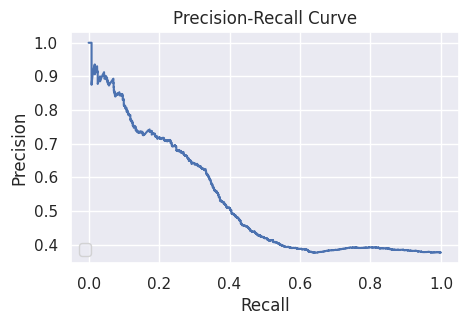

Confusion Matrix:
[[2488  269]
 [1177  486]]


In [32]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

### 6. NN Classifier and its accuracy


In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Creating a Sequential model
model = Sequential()

# Adding input layer and hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Adding output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # Increase epochs as needed

# Making predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Thresholding probabilities to get binary predictions

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Displaying classification report
NN_report = classification_report(y_test, y_pred)
print(NN_report)

Epoch 1/20
323/323 [==============================] - 1s 1ms/step - loss: 0.6509 - accuracy: 0.6460
Epoch 2/20
323/323 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.6615
Epoch 3/20
323/323 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.6622
Epoch 4/20
323/323 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.6635
Epoch 5/20
323/323 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.6639
Epoch 6/20
323/323 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6633
Epoch 7/20
323/323 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.6631
Epoch 8/20
323/323 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.6678
Epoch 9/20
323/323 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.6627
Epoch 10/20
323/323 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.6641

In summary, 67.4% accuracy can be considered decent, but it's essential to consider other factors and metrics to fully evaluate the model's performance.

Overall, the classification report provides a comprehensive overview of the model's performance for each class and overall. In this case, while the precision for both classes is relatively similar, the recall for class 1 is notably lower, indicating that the model struggles more with correctly identifying instances of class 1. The F1-score provides a balanced measure that considers both precision and recall.

F1 Score: 0.37500000000000006


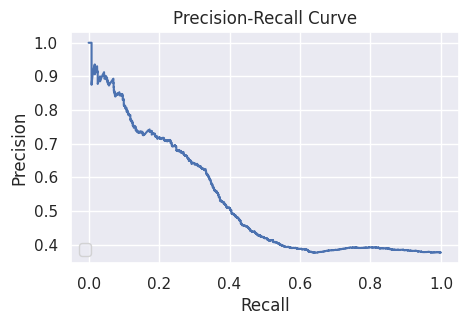

Confusion Matrix:
[[2548  209]
 [1231  432]]


In [34]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

plt.figure(figsize=(5, 3))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


### We combine the reports of all the models we used and choose the winner.

In [35]:
y# Assuming 'accuracy_reports' is a list of dictionaries containing accuracy and reports for each model
accuracy_reports = [
    {'Model': 'Decision Tree classifier', 'Accuracy': 0.477, 'Report': decisiontree_report},
    {'Model': 'Random Forest classifier', 'Accuracy': 0.533, 'Report': randomforest_report },
    {'Model': 'Gradient Boosting classifier', 'Accuracy': 0.674, 'Report': gradientboost_report },
    {'Model': 'SVM', 'Accuracy': 0.673, 'Report': svm_report},
    {'Model': 'KNN', 'Accuracy': 0.578, 'Report': nb_report },
    {'Model': 'NN', 'Accuracy': 0.676, 'Report': NN_report }
]

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(accuracy_reports)

# Set the index to the model names
df.set_index('Model', inplace=True)

# Print the DataFrame
print(df)

# Print reports
for idx, row in df.iterrows():
    print("\nModel: ", idx)
    print("Accuracy: ", row['Accuracy'])
    print("Report: \n", row['Report'])

                              Accuracy  \
Model                                    
Decision Tree classifier         0.477   
Random Forest classifier         0.533   
Gradient Boosting classifier     0.674   
SVM                              0.673   
KNN                              0.578   
NN                               0.676   

                                                                         Report  
Model                                                                            
Decision Tree classifier                    precision    recall  f1-score   ...  
Random Forest classifier                    precision    recall  f1-score   ...  
Gradient Boosting classifier                precision    recall  f1-score   ...  
SVM                                         precision    recall  f1-score   ...  
KNN                                         precision    recall  f1-score   ...  
NN                                          precision    recall  f1-score   ...  

Model:

In [36]:
from tabulate import tabulate

# Convert the DataFrame to a table format
table = tabulate(df, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table)

╒══════════════════════════════╤════════════╤═══════════════════════════════════════════════════════╕
│ Model                        │   Accuracy │ Report                                                │
╞══════════════════════════════╪════════════╪═══════════════════════════════════════════════════════╡
│ Decision Tree classifier     │      0.477 │ precision    recall  f1-score   support               │
│                              │            │                                                       │
│                              │            │            0       0.64      0.96      0.76      2757 │
│                              │            │            1       0.56      0.09      0.16      1663 │
│                              │            │                                                       │
│                              │            │     accuracy                           0.63      4420 │
│                              │            │    macro avg       0.60      0.52   

### The Neural Network (NN) classifier exhibits the highest accuracy among the listed models, achieving 67.4%. Therefore, based on accuracy alone, the NN model demonstrates superior performance compared to other classifiers in the evaluation.